In [36]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei']
csv_folder = r'Ranks\csv'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 说明---三个有效秩

为了更好的反应不同的scale对应的有效秩的大小和变化情况,希望可以在每一个scale下多做几次计算,这样的话,可以通过取平均等方法消除不确定的噪音

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# 首先加载自己的支持函数
from support_code.get_rank_cpu_0904 import get_Effective_Ranks, Effective_Ranks
from support_code.load_dataset import get_data_loader
from support_code.MLP import MLP
from support_code.scale_ranks import get_rank
# 然后加载其他可能需要的库
import torch
import torch.nn as nn
from torchvision.transforms import ToTensor
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
import torchvision
from torchvision.datasets import CIFAR10
import numpy as np
import os
# 指定存储图像的目录
output_dir = 'Ranks/csv'

# 如果目录不存在，创建它
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


In [8]:
import pandas as pd

# ------------------------------------训练开始前的基本设置---------------------------------------------------
# 设置设备
device_cuda = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---------------------------------- 设置结束----------------------------------------------------------------------------------
# 第一个维度

min_value = 0.1
max_value = 1.0
num_columns = 4
num_repetitions = 5


# 创建一个4x10的矩阵，每一行的内容都是相同的数字序列
matrix = np.array([np.linspace(min_value, max_value, int(max_value*num_repetitions))] * num_columns)

result_shape = tuple(len(matrix[i]) for i in range(num_columns)) + (num_repetitions, num_columns)
result_tensor = torch.zeros(result_shape, dtype=torch.float32)

for i, bright_scale in enumerate(matrix[0]):
    for j, contrast_scale in enumerate(matrix[1]):
        for k, saturation_scale in enumerate(matrix[2]):
            for l, hue_scale in enumerate(matrix[3]):

                print(bright_scale, contrast_scale, saturation_scale, hue_scale)
                train_loader, test_loader = get_data_loader(
                    bright_scale=bright_scale,
                    contrast_scale=contrast_scale,
                    saturation_scale=saturation_scale,
                    hue_scale=hue_scale
                )

                # 构建动态字符串
                index_rk = "rk_max_index"
                value_rk = "rk_max_value"
                value_Rk_index_max_rk = "value_Rk_index_max_rk" # 这里记录的是rk最大的时候的k对应的Rk的value
                r_0 = "r0"
                # 建立字典，保存结果
                rank_dict = {
                    index_rk: [],
                    value_rk: [],
                    value_Rk_index_max_rk: [],
                    r_0: []
                }

                for m in range(result_tensor.shape[-2]):
                    num1, num2, num3, num4 = get_rank(train_loader=train_loader, bright_scale=bright_scale, contrast_scale=contrast_scale, saturation_scale=saturation_scale, hue_scale=hue_scale, output_dir='Ranks')
                    # 将值按顺序添加到对应的列表中
                    rank_dict[index_rk].append(num1)
                    rank_dict[value_rk].append(num2)
                    rank_dict[value_Rk_index_max_rk].append(num3)
                    rank_dict[r_0].append(num4)

                df = pd.DataFrame(rank_dict)
                filename = "({:.4f}, {:.4f}, {:.4f}, {:.4f}).csv".format(bright_scale, contrast_scale, saturation_scale, hue_scale)
                df.to_csv(output_dir + '/' + filename, index=False)


print(result_tensor)
# 保存 result_tensor 到本地文件
output_filename = os.path.join(output_dir, "save_tensor.pth")
torch.save(result_tensor, output_filename)


0.1 0.1 0.1 0.1
*****************         这里考察的是:
 brightness_scale=0.1
 contrast_scale=0.1
 saturation_scale=0.1 
 hue_scale=0.1
**********************
Files already downloaded and verified
Files already downloaded and verified
0.1 0.1 0.1 0.325
*****************         这里考察的是:
 brightness_scale=0.1
 contrast_scale=0.1
 saturation_scale=0.1 
 hue_scale=0.325
**********************
Files already downloaded and verified
Files already downloaded and verified
0.1 0.1 0.1 0.55
*****************         这里考察的是:
 brightness_scale=0.1
 contrast_scale=0.1
 saturation_scale=0.1 
 hue_scale=0.55
**********************
Files already downloaded and verified
Files already downloaded and verified
0.1 0.1 0.1 0.775
*****************         这里考察的是:
 brightness_scale=0.1
 contrast_scale=0.1
 saturation_scale=0.1 
 hue_scale=0.775
**********************
Files already downloaded and verified
Files already downloaded and verified
0.1 0.1 0.1 1.0
*****************         这里考察的是:
 brightness_scale=0.1
 c

In [13]:
print(result_tensor)
# 保存 result_tensor 到本地文件
output_filename = os.path.join(output_dir, "save_tensor.pth")
torch.save(result_tensor, output_filename)


tensor([[[[[[1.9270e+03, 3.5068e+05, 6.5035e+02, 3.3214e+00],
            [1.9280e+03, 4.1908e+06, 5.0045e+02, 3.3010e+00],
            [1.9250e+03, 1.3369e+06, 3.1649e+02, 3.3547e+00],
            ...,
            [1.9270e+03, 2.1041e+06, 5.9454e+02, 3.4648e+00],
            [1.9270e+03, 2.1968e+07, 4.7469e+02, 3.3232e+00],
            [1.9270e+03, 9.9972e+05, 4.9916e+02, 3.2796e+00]],

           [[1.9230e+03, 1.6375e+07, 6.1804e+02, 3.4209e+00],
            [1.9280e+03, 3.8541e+06, 6.8456e+02, 3.5844e+00],
            [1.9290e+03, 5.1694e+07, 4.9109e+02, 3.5321e+00],
            ...,
            [1.9240e+03, 3.6988e+06, 3.3160e+02, 3.5314e+00],
            [1.9230e+03, 2.5528e+06, 5.5829e+02, 3.3250e+00],
            [1.9270e+03, 1.1315e+06, 6.7014e+02, 3.1853e+00]],

           [[1.9280e+03, 6.8296e+05, 5.5416e+02, 3.2084e+00],
            [1.9280e+03, 1.3164e+06, 6.1309e+02, 3.5000e+00],
            [1.9250e+03, 1.4167e+06, 3.4306e+02, 3.1296e+00],
            ...,
            [1.

In [ ]:
# 假设 result_tensor 已经创建，形状为 (9, 3, 4)

# 获取 result_tensor 中的数据
data = result_tensor.numpy()  # 转换为 NumPy 数组

# 创建一个列表来保存不同类型的点的标签
legend_labels = ['rk_max_index', 'rk_max_value', 'Rk_value_max_rk_index', 'rk[0]']

# 创建一个颜色和形状的列表以区分不同的点
colors = ['b', 'g', 'r', 'c']  # 不同颜色
markers = ['o', 's', 'D', '^']  # 不同形状

# 创建一个图形，分为4个子图
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 针对每种数据类型创建子图
for i in range(result_tensor.shape[2]):
    ax = axes[i // 2, i % 2]  # 获取当前子图
    ax.set_title(legend_labels[i])  # 子图标题
    for j in range(result_tensor.shape[0]):
        x = [j] * result_tensor.shape[1]  # 同一横坐标位置
        y = data[j, :, i]  # 不同数据点的值
        ax.scatter(x, y)

    # 添加图例
    # ax.legend()

# 设置横坐标和纵坐标标签
for ax in axes.flat:
    ax.set(xlabel='scale', ylabel='Values')

# 调整子图布局
plt.tight_layout()
# 保存整个大图
output_filename = os.path.join(output_dir, "ranks单独.png")
plt.savefig(output_filename)
print(f"Combined plot saved as '{output_filename}'")

# 显示图形
plt.show()


In [ ]:
# 假设 result_tensor 已经创建，形状为 (9, 3, 4)

# 获取 result_tensor 中的数据
data = result_tensor.numpy()  # 转换为 NumPy 数组

# 创建一个列表来保存不同类型的点的标签
legend_labels = ['rk_max_index', 'rk_max_value', 'Rk_value_max_rk_index', 'rk[0]']

# 创建一个颜色和形状的列表以区分不同的点
colors = ['b', 'g', 'r', 'c']  # 不同颜色
markers = ['o', 's', 'D', '^']  # 不同形状

# 创建一个图形，分为4个子图
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 针对每种数据类型创建子图
for i in range(result_tensor.shape[2]):
    ax = axes[i // 2, i % 2]  # 获取当前子图
    ax.set_title(legend_labels[i])  # 子图标题
    for j in range(result_tensor.shape[0]):
        x = [j]   # 同一横坐标位置
        y = data[j, :, i].mean()  # 不同数据点的值
        ax.scatter(x, y)

    # 添加图例
    # ax.legend()

# 设置横坐标和纵坐标标签
for ax in axes.flat:
    ax.set(xlabel='scale', ylabel='Values')

# 调整子图布局
plt.tight_layout()
# 保存整个大图
output_filename = os.path.join(output_dir, "ranks平均.png")
plt.savefig(output_filename)
print(f"Combined plot saved as '{output_filename}'")

# 显示图形
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 result_tensor 已经创建，形状为 (9, 3, 4)
# 获取 result_tensor 中的数据
data = result_tensor.numpy()  # 转换为 NumPy 数组

# 创建一个列表来保存不同类型的点的标签
legend_labels = ['rk_max_index', 'rk_max_value', 'Rk_value_max_rk_index', 'rk[0]']

# 创建一个颜色和形状的列表以区分不同的点
colors = ['b', 'g', 'r', 'c']  # 不同颜色
markers = ['o', 's', 'D', '^']  # 不同形状

# 创建一个图形，分为4个子图
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 针对每种数据类型创建子图
for i in range(result_tensor.shape[2]):
    ax = axes[i // 2, i % 2]  # 获取当前子图
    ax.set_title(legend_labels[i])  # 子图标题
    for j in range(result_tensor.shape[0]):
        x = j  # 横坐标位置
        y = data[j, :, i]  # 不同数据点的值
        mean_y = np.mean(y)  # 计算平均值
        std_y = np.std(y)  # 计算标准差
        ax.errorbar(x, mean_y, yerr=std_y, fmt=colors[i]+markers[i])

    # 添加图例
    # ax.legend()

# 设置横坐标和纵坐标标签
for ax in axes.flat:
    ax.set(xlabel='scale', ylabel='Values')

# 调整子图布局
plt.tight_layout()
# 保存整个大图
output_filename = os.path.join(output_dir, "ranks_with_error_bars.png")
plt.savefig(output_filename)
print(f"Combined plot with error bars saved as '{output_filename}'")

# 显示图形
plt.show()


# 新时代下处理ranks的新方法

## 定义函数获得文件夹中数据

`calculate_mean_and_variance`函数返回了一个df,包括完整的mean和variances

## 整理df数据

`df`数据处理不是很舒服,转化为`numpy`便于处理,其实主要是对整体的形状做出了调整

## 可视化

得到带有误差帮的图像

In [33]:
from support_code.draw_rank import *

result_data = calculate_mean_and_variance(csv_folder)


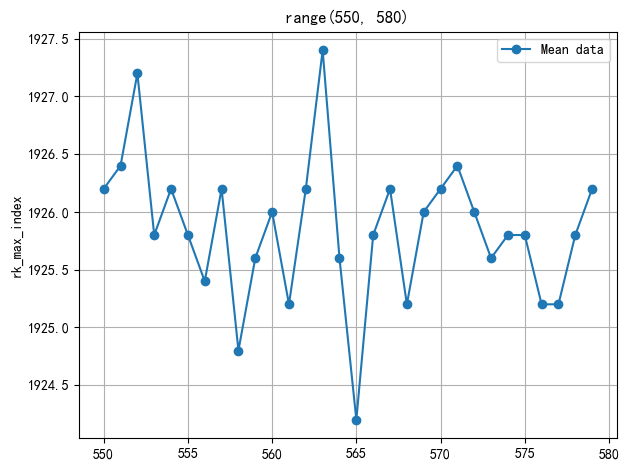

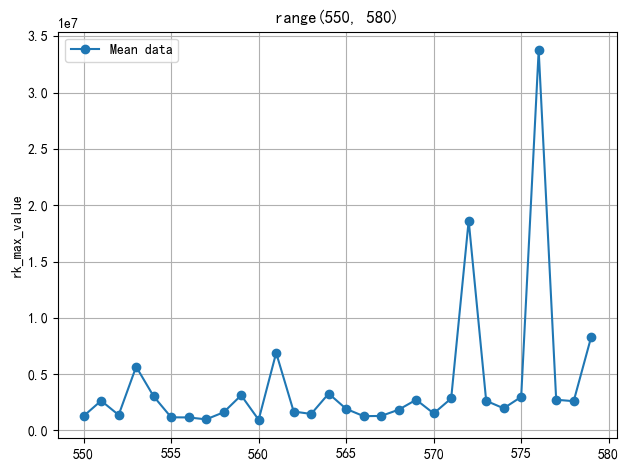

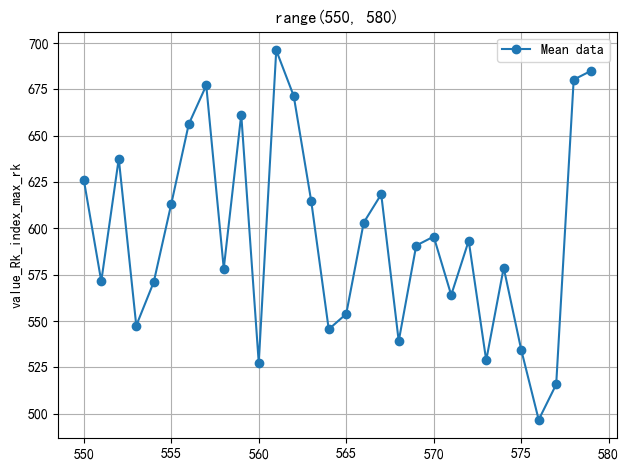

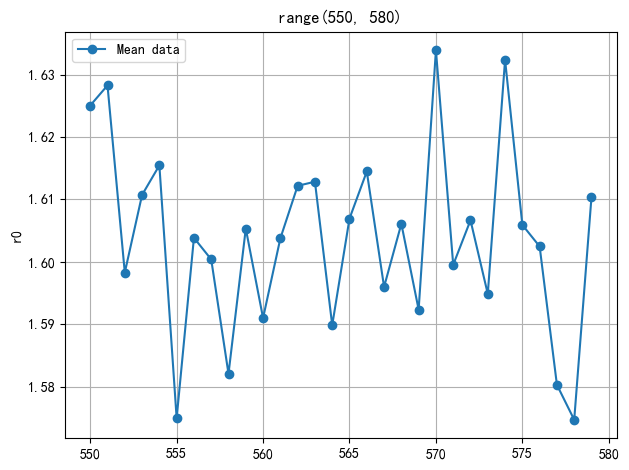

In [93]:
columns_to_plot = ["rk_max_index", "rk_max_value", "value_Rk_index_max_rk", "r0"]
for i, ranks in enumerate(result_data):

    # scatter_plot_with_error_bars(ranks[min:max], y_label=columns_to_plot[i], title=f'{columns_to_plot[i]}+{min}-{max}',img_folder = 'Ranks\img\\bar')
    scatter_plot_mean(x_data=range(5*110,5*116,1), data=ranks, y_label=columns_to_plot[i],img_folder = 'Ranks\img\mean', plot=True)